# SARIMA = Seasonal Auto Regression Integrated Moving Average

SARIMA(p,d,q)(P,D,Q)m
- p: Trend autoregression order
- d: Trend difference order
- q: Trend moving average order
# Seasonal Elements:
- P: Seasonal autoregressive order
- D: Seasonal difference order
- Q: Seasonal moving average order
- m: The number of time steps for a single seasonal period.

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [68]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv')
df.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
0,1963-01,6827.0
1,1963-02,6178.0
2,1963-03,7084.0
3,1963-04,8162.0
4,1963-05,8462.0
5,1963-06,9644.0
6,1963-07,10466.0
7,1963-08,10748.0
8,1963-09,9963.0
9,1963-10,8194.0


In [69]:
# Find the problematic value(s)
problematic_values = []
for value in df['Month']:
    try:
        pd.to_datetime(value)
    except Exception as e:
        problematic_values.append((value, e))

# Print the problematic value(s)
print(problematic_values)

[('U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970', ParserError('Unknown string format: U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970 present at position 0'))]


In [70]:
# Remove or replace the invalid entry
df = df[df['Month'] != 'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970']

# Retry the conversion of the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

In [71]:
df.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970': 'MilesMM'}, inplace=True)

In [72]:
df.head(10)

,MilesMM
Month,
1963-01-01,6827.0
1963-02-01,6178.0
1963-03-01,7084.0
1963-04-01,8162.0
1963-05-01,8462.0
1963-06-01,9644.0
1963-07-01,10466.0
1963-08-01,10748.0
1963-09-01,9963.0


In [73]:
df.dtypes

MilesMM    float64
dtype: object

In [74]:
# Fill missing values with the mean
df['MilesMM'].fillna(df['MilesMM'].mean(), inplace=True)


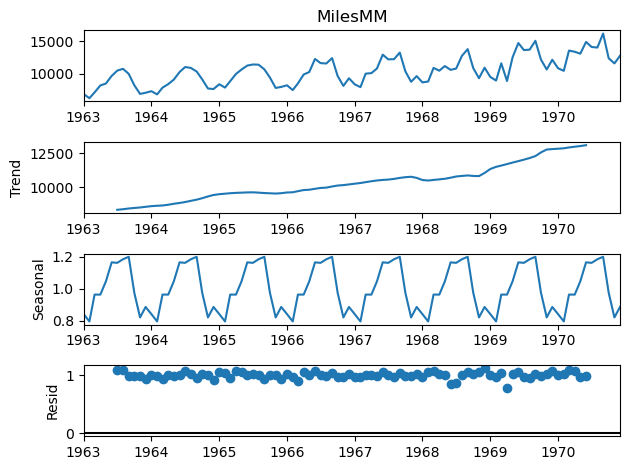

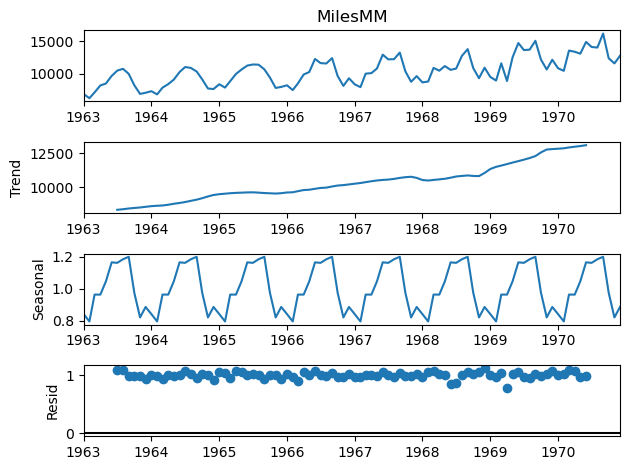

In [75]:
result = seasonal_decompose(df['MilesMM'], model='multiplicative')
result.plot()

In [76]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

c:\Users\shahd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
model_fit = model.fit()

c:\Users\shahd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\shahd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\shahd\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

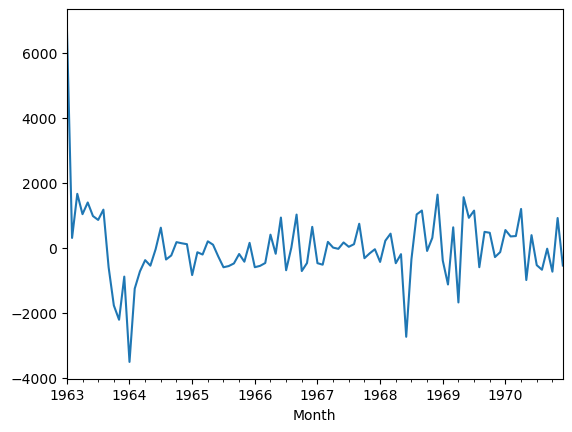

In [78]:
residuals = model_fit.resid
residuals.plot()

In [79]:
output = model_fit.forecast()
output

1971-01-01    11474.723641
Freq: MS, dtype: float64

In [80]:
output = model_fit.forecast(12)
output

1971-01-01    11474.723641
1971-02-01    11153.049552
1971-03-01    13667.694842
1971-04-01    12645.352191
1971-05-01    14339.009921
1971-06-01    15785.254973
1971-07-01    14977.845926
1971-08-01    15361.680635
1971-09-01    16961.597078
1971-10-01    13681.971113
1971-11-01    12426.358139
1971-12-01    13728.751918
Freq: MS, Name: predicted_mean, dtype: float64

In [81]:
yhat = model_fit.predict()
yhat

1963-01-01        0.000000
1963-02-01     5871.437576
1963-03-01     5420.598428
1963-04-01     7124.545187
1963-05-01     7064.964932
                  ...     
1970-08-01    14728.872414
1970-09-01    16258.327850
1970-10-01    13119.743903
1970-11-01    10676.173706
1970-12-01    13314.687608
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

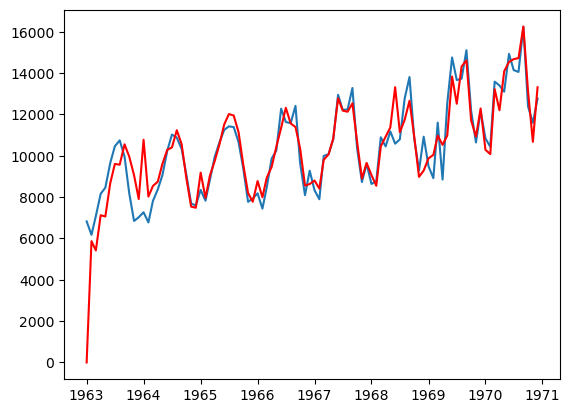

In [82]:
plt.plot(df['MilesMM'])
plt.plot(yhat, color='red')

# #NOTE:
A trend is the presence of a long-term increase or decrease in the sequence. Seasonality is a variation that occurs at specific regular intervals of less than a year. Seasonality can occur on different time spans such as daily, weekly, monthly, or yearly.